In [46]:
# Load dataset and filter out some columns
# Original:  https://www.kaggle.com/datasets/parisrohan/credit-score-classification?resource=download

import pandas as pd
# load dataset
file_path = 'bank_credits.csv'
df = pd.read_csv(file_path, on_bad_lines = 'skip', engine = 'python')
df = df.dropna() # if we want harder problem, dont drop missing values
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53049 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        53049 non-null  object 
 1   Customer_ID               53049 non-null  object 
 2   Month                     53049 non-null  object 
 3   Name                      53049 non-null  object 
 4   Age                       53049 non-null  object 
 5   SSN                       53049 non-null  object 
 6   Occupation                53049 non-null  object 
 7   Annual_Income             53049 non-null  object 
 8   Monthly_Inhand_Salary     53049 non-null  float64
 9   Num_Bank_Accounts         53049 non-null  int64  
 10  Num_Credit_Card           53049 non-null  int64  
 11  Interest_Rate             53049 non-null  int64  
 12  Num_of_Loan               53049 non-null  object 
 13  Type_of_Loan              53049 non-null  object 
 14  Delay_from_

In [54]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000
mean,4024.502617,16.842806,22.787253,76.272352,21.994119,27.062866,32.219031,1445.924761
std,3094.967739,115.605025,129.339640,479.226709,15.220406,187.185825,5.057398,8407.429893
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.881250,4.462837
25%,1575.345833,4.000000,4.000000,8.000000,10.000000,3.000000,28.046338,41.244418
50%,2991.016667,6.000000,6.000000,15.000000,19.000000,6.000000,32.251786,78.418272
75%,5712.553333,8.000000,7.000000,22.000000,29.000000,9.000000,36.408991,169.286269
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2594.000000,49.564519,82331.000000


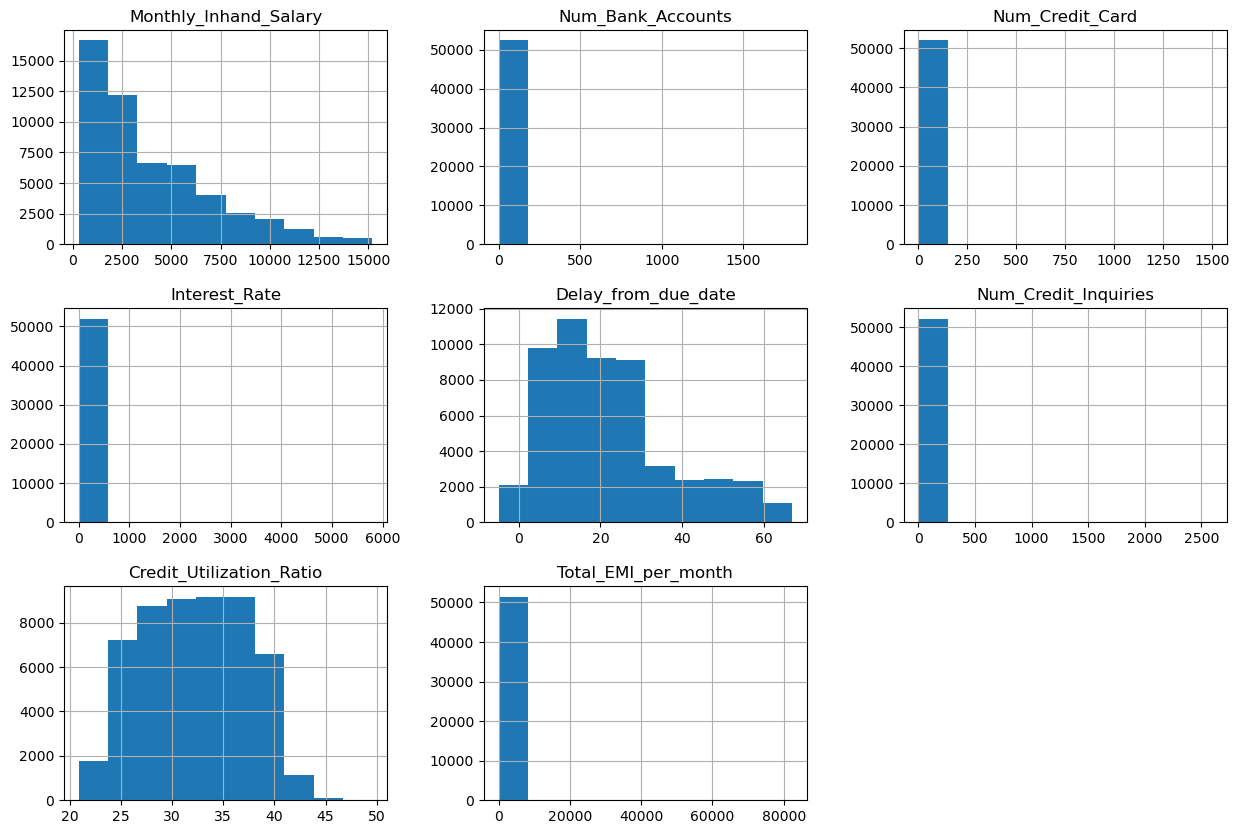

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(15, 10))
plt.show()

In [58]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    27951
Poor        16516
Good         8582
Name: count, dtype: int64

In [60]:
score_mapping = {'Standard': 0, 'Poor': -1, 'Good': 1}

# Applying the mapping
df['Credit_Score'] = df['Credit_Score'].map(score_mapping)

In [62]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score
count,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000
mean,4024.502617,16.842806,22.787253,76.272352,21.994119,27.062866,32.219031,1445.924761,-0.149560
std,3094.967739,115.605025,129.339640,479.226709,15.220406,187.185825,5.057398,8407.429893,0.671379
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.881250,4.462837,-1.000000
25%,1575.345833,4.000000,4.000000,8.000000,10.000000,3.000000,28.046338,41.244418,-1.000000
50%,2991.016667,6.000000,6.000000,15.000000,19.000000,6.000000,32.251786,78.418272,0.000000
75%,5712.553333,8.000000,7.000000,22.000000,29.000000,9.000000,36.408991,169.286269,0.000000
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2594.000000,49.564519,82331.000000,1.000000


In [64]:
df['Credit_Score'].value_counts()

Credit_Score
 0    27951
-1    16516
 1     8582
Name: count, dtype: int64

In [68]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,1
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,1
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,0
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,1
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.2561579776419,-1
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,-1
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,-1
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,-1


In [66]:
df.to_csv('filtered_bank_scores.csv', index = False) # optional

In [70]:
# Randomly sample 1000 rows from the dataset and save the result to a new file named dataset_test.csv
# Do not include the samples that are already in dataset_sample.csv

df_filtered = df
df_test = df_filtered.sample(n=8841, replace=False)

df_test.to_csv("dataset_eval_t.csv", index=False)
df_test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
73158,0x1c2a8,CUS_0xa137,July,Bartza,28,012-08-7560,Engineer,101066.4_,8547.200000,4,...,Standard,1461.27,42.758858,27 Years and 9 Months,Yes,95.706765,57.424265300077685,High_spent_Large_value_payments,941.5889698361252,0
85430,0x20a90,CUS_0xc1a6,July,Rr,32,#F%$D@*&8,Manager,12805.5,1188.125000,4,...,Standard,1376.62,38.428253,29 Years and 10 Months,No,16.095339,27.8631850898842,!@9#%8,314.8539762250388,0
79810,0x1e9a4,CUS_0x1f04,March,rob,37,387-02-5364,Manager,60770.22,4924.185000,8,...,Standard,176.02,36.386528,28 Years and 3 Months,No,190.274574,502.489621875097,Low_spent_Small_value_payments,89.65430429648285,0
704,0x1a22,CUS_0x4af0,January,Nicolacih,18,397-45-5329,Developer,27070.07,2518.839167,7,...,Standard,919.76,28.555850,29 Years and 2 Months,No,73.233318,76.31458794990105,High_spent_Small_value_payments,362.33601023741403,0
87860,0x218ce,CUS_0x5b90,May,Nick Edwardsa,42,341-11-8430,Architect,98992.92,8207.410000,5,...,_,441.72,36.329658,19 Years and 3 Months,Yes,240.811904,425.44022223241797,Low_spent_Small_value_payments,444.4888737539801,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75379,0x1cfad,CUS_0x7dc6,April,Scuffhamw,32,995-81-3178,Lawyer,127760.4,10721.700000,2,...,Good,443.32,32.338585,16 Years and 1 Months,No,373.921956,214.93575355938071,High_spent_Medium_value_payments,733.3122902740181,1
5840,0x383a,CUS_0x4cfd,January,Edwinp,37,776-43-3476,Engineer,75650.04,6134.170000,10,...,Bad,2525.56,41.163070,6 Years and 4 Months,Yes,327.534571,259.8931241040983,High_spent_Medium_value_payments,275.9893048298276,0
28862,0xbf1c,CUS_0x7b38,July,Wayne Coleg,30,738-27-7124,Musician,101696.19,8432.682500,5,...,Standard,545.89,33.269084,27 Years and 1 Months,No,111.976512,650.4272380725963,Low_spent_Small_value_payments,370.86449996166505,-1
32263,0xd309,CUS_0x4425,August,Andreasy,15,821-88-7412,Doctor,59788.89,5053.407500,9,...,Bad,3547.66,36.432540,7 Years and 5 Months,Yes,188.578713,274.1835571537102,Low_spent_Small_value_payments,332.57847959719237,-1


In [72]:
# Randomly sample 5000 rows from the dataset and save the result to a new file named dataset_train.csv
# Do not include the samples that are already in other two files
df_filtered_train = df_filtered[~df_filtered["ID"].isin(df_test["ID"])]
df_train = df_filtered_train.sample(n=44207, replace=False)
df_train.to_csv("dataset_train.csv", index=False)

df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
13888,0x6762,CUS_0x6fe2,January,Schnurra,25,164-17-6558,Accountant,62214.36,4997.530000,9,...,_,2892.91,31.737712,13 Years and 10 Months,Yes,339.971582,216.583807190171,High_spent_Small_value_payments,203.19761100877272,-1
63726,0x18b64,CUS_0xb13c,July,Jennifert,33,528-06-6283,_______,14613.65,1334.804167,8,...,Bad,2882.07,27.414562,2 Years and 3 Months,Yes,67.975819,57.54453501725725,High_spent_Small_value_payments,267.96006258969163,0
27791,0xb8d5,CUS_0xa0c3,August,Chanf,56,355-23-1301,Lawyer,101112.6,8600.050000,8,...,Good,399.49,36.516160,29 Years and 3 Months,No,143.856735,132.07082261639974,High_spent_Large_value_payments,824.0774428659337,1
4225,0x2ec3,CUS_0x6732,February,alazsh,50,060-69-0738,Journalist,140390.32,11888.193333,5,...,Good,1423.23,36.955252,30 Years and 9 Months,No,182.160424,133.2130344228415,High_spent_Medium_value_payments,1123.4458751336915,1
888,0x1b36,CUS_0x8c69,January,Toonkelf,24,070-07-9414,Musician,20188.02,1851.335000,4,...,_,399.92,28.542585,20 Years and 2 Months,No,25.580281,147.63621347336863,Low_spent_Large_value_payments,281.91700571081503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54734,0x156b4,CUS_0x36f2,July,Phil Wahbag,40,661-06-7195,Scientist,15366.215,996.517917,4,...,Standard,189.59,33.137150,29 Years and 7 Months,No,9.091012,73.95678949855329,Low_spent_Small_value_payments,306.6039898643759,0
9755,0x4f29,CUS_0x664c,April,Lorenzim,19,482-10-4462,Doctor,72125.2,6094.433333,3,...,_,95.23,25.693600,19 Years and 10 Months,Yes,84.489296,__10000__,High_spent_Large_value_payments,689.5478846629123,0
64058,0x18d58,CUS_0x75ba,March,Amani,32,676-38-0279,Writer,20723.8,1611.983333,7,...,Bad,4394.08,29.059281,12 Years and 0 Months,NM,95.605958,196.9927524615952,Low_spent_Small_value_payments,158.59962266572833,-1
5163,0x3441,CUS_0x7047,April,Alexeix,18,560-15-2864,Teacher,16532.33,1416.694167,5,...,Standard,2551.12,23.790906,10 Years and 11 Months,Yes,52.680068,89.85531876668489,Low_spent_Large_value_payments,269.13403001424274,0


In [74]:
# Load the dataset_eval_with_target.csv and drop the "Price" column and save the result to a new file named dataset_eval.csv
df_eval = pd.read_csv("dataset_eval_t.csv")
df_eval = df_eval.drop(columns=["Credit_Score"])
df_eval.to_csv("dataset_eval.csv", index=False)

df_eval

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1c2a8,CUS_0xa137,July,Bartza,28,012-08-7560,Engineer,101066.4_,8547.200000,4,...,6.0,Standard,1461.27,42.758858,27 Years and 9 Months,Yes,95.706765,57.424265300077685,High_spent_Large_value_payments,941.5889698361252
1,0x20a90,CUS_0xc1a6,July,Rr,32,#F%$D@*&8,Manager,12805.5,1188.125000,4,...,4.0,Standard,1376.62,38.428253,29 Years and 10 Months,No,16.095339,27.8631850898842,!@9#%8,314.8539762250388
2,0x1e9a4,CUS_0x1f04,March,rob,37,387-02-5364,Manager,60770.22,4924.185000,8,...,6.0,Standard,176.02,36.386528,28 Years and 3 Months,No,190.274574,502.489621875097,Low_spent_Small_value_payments,89.65430429648285
3,0x1a22,CUS_0x4af0,January,Nicolacih,18,397-45-5329,Developer,27070.07,2518.839167,7,...,1.0,Standard,919.76,28.555850,29 Years and 2 Months,No,73.233318,76.31458794990105,High_spent_Small_value_payments,362.33601023741403
4,0x218ce,CUS_0x5b90,May,Nick Edwardsa,42,341-11-8430,Architect,98992.92,8207.410000,5,...,4.0,_,441.72,36.329658,19 Years and 3 Months,Yes,240.811904,425.44022223241797,Low_spent_Small_value_payments,444.4888737539801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8836,0x1cfad,CUS_0x7dc6,April,Scuffhamw,32,995-81-3178,Lawyer,127760.4,10721.700000,2,...,3.0,Good,443.32,32.338585,16 Years and 1 Months,No,373.921956,214.93575355938071,High_spent_Medium_value_payments,733.3122902740181
8837,0x383a,CUS_0x4cfd,January,Edwinp,37,776-43-3476,Engineer,75650.04,6134.170000,10,...,8.0,Bad,2525.56,41.163070,6 Years and 4 Months,Yes,327.534571,259.8931241040983,High_spent_Medium_value_payments,275.9893048298276
8838,0xbf1c,CUS_0x7b38,July,Wayne Coleg,30,738-27-7124,Musician,101696.19,8432.682500,5,...,1.0,Standard,545.89,33.269084,27 Years and 1 Months,No,111.976512,650.4272380725963,Low_spent_Small_value_payments,370.86449996166505
8839,0xd309,CUS_0x4425,August,Andreasy,15,821-88-7412,Doctor,59788.89,5053.407500,9,...,10.0,Bad,3547.66,36.432540,7 Years and 5 Months,Yes,188.578713,274.1835571537102,Low_spent_Small_value_payments,332.57847959719237


In [76]:
# checking for null rows, dont set traps

target_datasets = [df_train, df_eval]
for dfx in target_datasets:
    missing_rows = dfx[dfx.isna().any(axis=1)]
    assert len(missing_rows) == 0, "The datasets contain NULL tables"

missing_rows.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
